# <span style="color:red">Solution</span> - Compensated Risk

### Data

Consider the excess return data in `data/spx_returns_weekly.xlsx`. 

### 1.
For each stock, calculate the (annualized) mean as well as the following measures of risk
* volatility
* skewness
* 5th quantile return
* max drawdown
* correlation to SPY

For each risk measure, make a scatter plot of stocks risk on the horizontal axis and the stock's mean return on the vertical axis.

### 2.
Do any of these scatterplots show strong evidence of a relationship between risk and return?

***

### **<span style="color:red">1.1.</span>**

In [ ]:
import pandas as pd
import numpy as np

from cmds.portfolio import maximumDrawdown

In [ ]:
INFILE = "../data/spx_returns_weekly.xlsx"
FREQ = 52

SHEET = 's&p500 rets'
rets = pd.read_excel(INFILE,sheet_name=SHEET).set_index('date')
SHEET = 'benchmark rets'
TICK = 'SPY'
TICK_RF = 'SHV'
facs = pd.read_excel(INFILE,sheet_name=SHEET).set_index('date')
spy = facs[[TICK]]

In [ ]:
QUANTILE = .05

stats = pd.DataFrame(index=rets.columns,columns=['mean','vol','skewness','kurtosis','quantile','max drawdown'],dtype=float)
stats['mean'] = rets.mean() * FREQ
stats['vol'] = rets.std() * np.sqrt(FREQ)
stats['skewness'] = rets.skew()
stats['kurtosis'] = rets.kurtosis()
stats['quantile'] = rets.quantile(QUANTILE)
stats['max drawdown'] = maximumDrawdown(rets)['Max Drawdown']
stats[f'corr'] = pd.concat([rets,spy],axis=1).corr().loc['SPY']

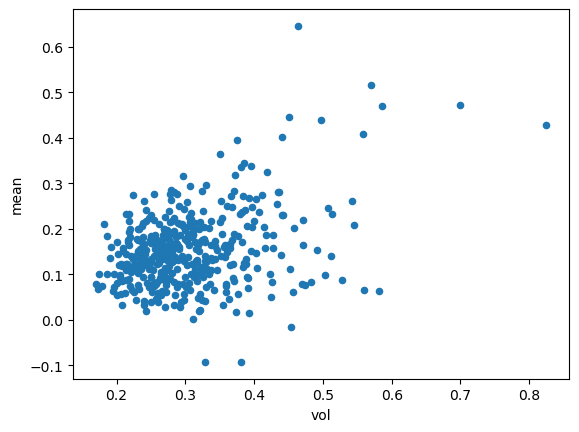

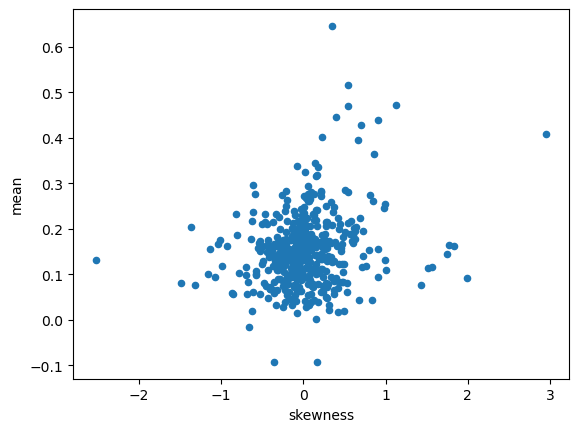

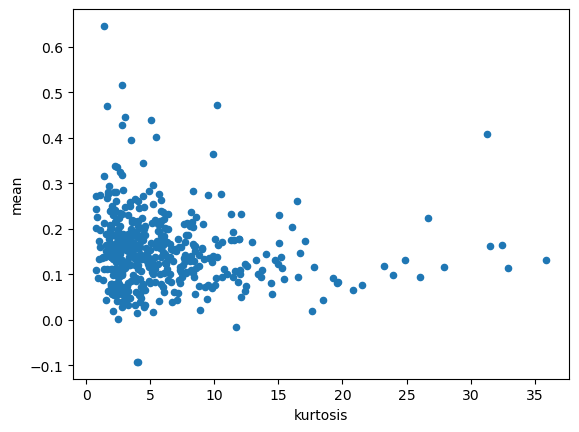

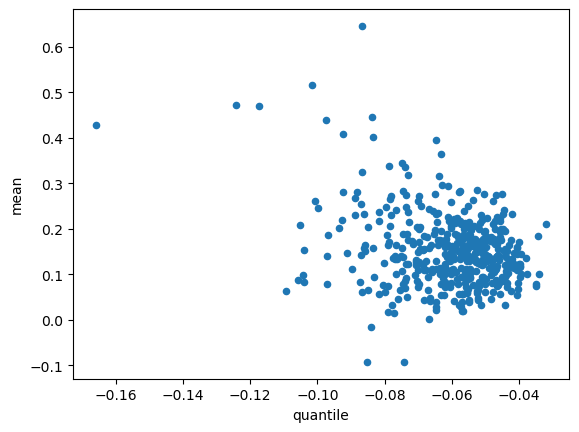

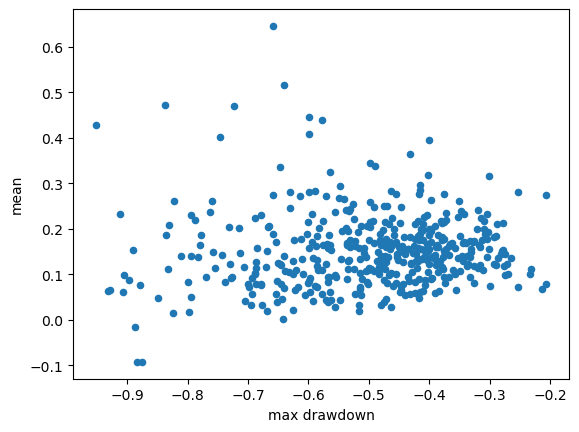

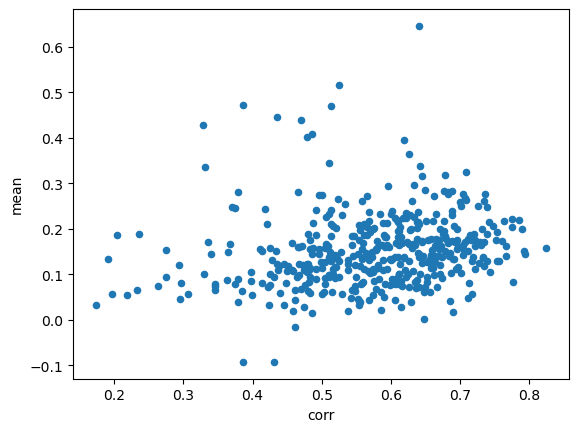

In [ ]:
for col in stats.columns[1:]:
    stats.plot.scatter(y='mean',x=col)

### **<span style="color:red">1.2.</span>**

None of the metrics show a strong proportional relationship to historic mean return.

This could indicate that...
* historic mean or historic risk are not good indicators of the future.
* there is some other risk metric which corresponds better to mean returns.
* markets do not efficiently price risk: perhaps is no clear relationship between risk and return.

We will see further evidence for the first and second ideas in other discussions.